# Assignment 1 of ECE657A:

## Team members:
### Hadi Nekoeiqachkanloo (Waterloo ID: 20727088)
### Benyamin Ghojogh (Waterloo ID: 20743301)

#### Import packages:

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from random import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import LocallyLinearEmbedding as LLE

#### Settings:

In [133]:
path_dataset_A = './datasets/DataA.mat'
path_dataset_B = './datasets/DataB.mat'

#### display numpy array in beautiful form:

In [134]:
def disp_array_beautiful(numpy_array, number_of_rows=10):
    data_dataFrame = pd.DataFrame(data=numpy_array, columns=None)  # convert numpy array to pandas data frame
    display(data_dataFrame.head(number_of_rows))  # displaying a portion of the dataset

#### Reading datasets and displaying a portion of it:

In [135]:
dataA = loadmat(path_dataset_A)
dataA = dataA['fea']
disp_array_beautiful(numpy_array=dataA, number_of_rows=10)

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0
5,-171.0,432.0,924.0,-179.0,1011.0,85.0,-204.0,945.0,336.0,94.0,...,655.0,-274.0,-323.0,-626.0,-969.0,-267.0,27.0,-36.0,32.0,9.0
6,-169.0,429.0,949.0,-175.0,1007.0,102.0,-188.0,914.0,322.0,154.0,...,655.0,-263.0,-331.0,-627.0,-975.0,-273.0,17.0,-27.0,28.0,3.0
7,-160.0,423.0,927.0,-195.0,996.0,123.0,-213.0,925.0,302.0,128.0,...,655.0,-251.0,-337.0,-628.0,-955.0,-275.0,8.0,-40.0,22.0,32.0
8,-163.0,432.0,929.0,-178.0,994.0,101.0,-186.0,946.0,296.0,166.0,...,654.0,-239.0,-343.0,-630.0,-967.0,-267.0,15.0,-34.0,-7.0,15.0
9,-156.0,415.0,936.0,-186.0,1014.0,111.0,-195.0,960.0,280.0,202.0,...,653.0,-228.0,-351.0,-631.0,-964.0,-264.0,7.0,-29.0,6.0,15.0


In [136]:
dataB = loadmat(path_dataset_B)
dataB
dataB_fea = dataB['fea']  # features
dataB_gnd = dataB['gnd']  # labels (ground truth)
disp_array_beautiful(numpy_array=dataB_fea, number_of_rows=10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1
5,0,0,1,5,0,5,2,4,3,2,...,2,4,4,5,4,1,1,1,1,1
6,1,3,3,5,3,2,4,4,2,1,...,2,2,2,2,3,5,2,4,0,1
7,3,3,0,5,2,1,2,5,3,0,...,0,2,1,3,2,2,4,2,1,5
8,5,0,3,3,1,3,0,0,2,3,...,1,4,3,0,1,2,3,5,1,2
9,5,5,4,5,3,1,0,0,4,1,...,4,3,1,4,2,0,3,1,4,1


In [137]:
disp_array_beautiful(numpy_array=dataB_gnd.T, number_of_rows=10)

,0,1,2,3,4,5,6,7,8,9,...,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065
0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


# Question II:

## Question II (Part 1):

In [138]:
pca = PCA()
pca.fit(X=dataB_fea)
eigenvectors = pca.components_   # shape: (n_components, n_features)
eigenvalues = pca.explained_variance_   # shape: (n_components,)
disp_array_beautiful(numpy_array=eigenvectors, number_of_rows=5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.000036,0.000019,-0.000012,-0.000056,0.000005,0.000083,-0.000021,-0.000046,-0.000070,-0.000029,...,-0.000019,-0.000015,0.000032,-0.000046,0.000080,0.000020,-0.000048,1.131941e-05,-0.000030,0.000089
1,0.000041,0.000026,-0.000072,-0.000016,0.000022,-0.000009,-0.000070,0.000073,-0.000001,-0.000051,...,0.000037,0.000016,0.000092,0.000029,0.000039,-0.000019,0.000122,2.516627e-06,0.000096,0.000104
2,0.000049,0.000010,-0.000051,0.000001,0.000104,0.000026,-0.000009,-0.000059,-0.000011,-0.000004,...,0.000202,-0.000162,0.000037,-0.000111,-0.000102,-0.000087,-0.000133,4.482726e-05,-0.000060,0.000014
3,0.000020,0.000064,0.000017,-0.000023,0.000121,-0.000052,0.000064,-0.000075,0.000016,0.000103,...,0.000159,0.000033,-0.000070,-0.000134,0.000010,0.000030,0.000010,-3.959176e-06,-0.000072,0.000019
4,-0.000090,0.000150,0.000022,-0.000019,0.000022,0.000152,0.000139,0.000095,-0.000014,0.000029,...,0.000069,0.000024,0.000011,-0.000019,0.000090,0.000155,-0.000035,-8.389430e-07,-0.000085,0.000049


In [139]:
disp_array_beautiful(numpy_array=eigenvalues, number_of_rows=5)

,0
0,467242.206542
1,278894.145514
2,213480.283837
3,205514.153620
4,171638.869230


## Question II (Part 2):

#### projection of data onto PCA subspace (1st and 2nd directions):

In [140]:
dataB_fea_projected = pca.transform(X=dataB_fea)
dataB_fea_projected_1and2 = dataB_fea_projected[:,0:2]
disp_array_beautiful(numpy_array=dataB_fea_projected_1and2, number_of_rows=10)

,0,1
0,1069.166304,-513.973184
1,1099.176077,-570.842223
2,673.201385,-167.377150
3,1010.903339,-187.044145
4,1692.970822,-633.369398
5,1341.694310,-536.770010
6,1217.832623,-521.312900
7,226.761138,-457.324861
8,1219.222302,-479.274443
9,900.753262,-548.126694


#### plotting:

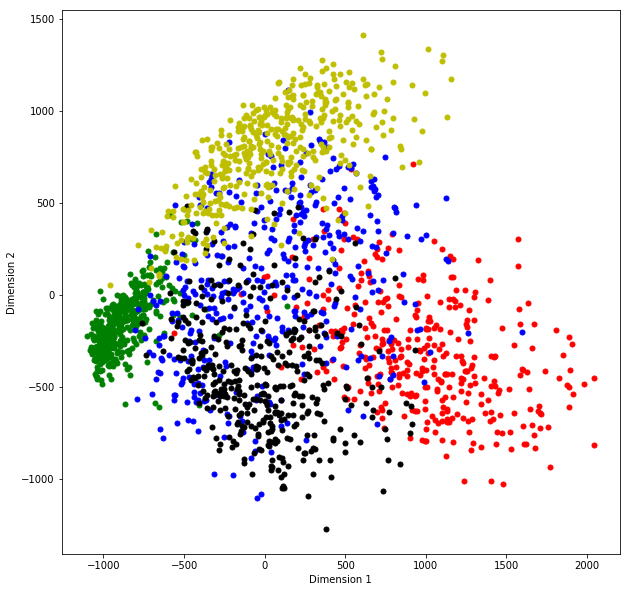

In [152]:
number_of_samples = len(dataB_gnd)
for sample_index in range(number_of_samples):
    sample = dataB_fea_projected_1and2[sample_index,:]
    if dataB_gnd[sample_index] == 0:
        color = 'r'
    elif dataB_gnd[sample_index] == 1:
        color = 'g'
    elif dataB_gnd[sample_index] == 2:
        color = 'b'
    elif dataB_gnd[sample_index] == 3:
        color = 'k'
    elif dataB_gnd[sample_index] == 4:
        color = 'y'
    plt.plot(sample[0], sample[1], 'o', markerfacecolor=color, markeredgecolor=color, markersize=5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# show plot bigger: https://stackoverflow.com/questions/41760737/output-figure-size-in-jupyter-notebook?rq=1
matplotlib.rcParams['figure.figsize'] = (10,10) 
plt.show()

## Question II (Part 3):

##### projection of data onto PCA subspace (5th and 6th directions):

In [142]:
dataB_fea_projected = pca.transform(X=dataB_fea)
dataB_fea_projected_5and6 = dataB_fea_projected[:,4:6]
disp_array_beautiful(numpy_array=dataB_fea_projected_5and6, number_of_rows=10)

,0,1
0,-387.873484,-335.304982
1,-345.573249,-530.737220
2,-1036.833666,76.531663
3,-901.897549,73.661148
4,6.919257,-601.851221
5,577.933576,140.191582
6,-680.648563,-501.999433
7,1017.001492,-87.023369
8,-722.007449,195.983302
9,-761.675828,-435.396163


#### plotting:

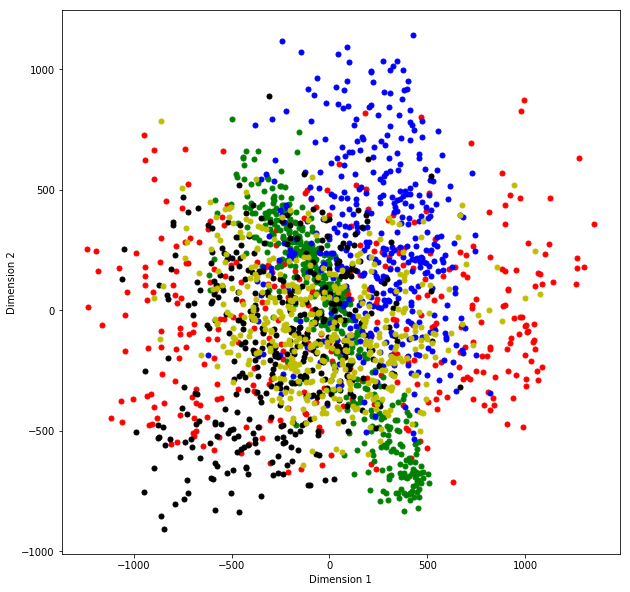

In [153]:
number_of_samples = len(dataB_gnd)
for sample_index in range(number_of_samples):
    sample = dataB_fea_projected_5and6[sample_index,:]
    if dataB_gnd[sample_index] == 0:
        color = 'r'
    elif dataB_gnd[sample_index] == 1:
        color = 'g'
    elif dataB_gnd[sample_index] == 2:
        color = 'b'
    elif dataB_gnd[sample_index] == 3:
        color = 'k'
    elif dataB_gnd[sample_index] == 4:
        color = 'y'
    plt.plot(sample[0], sample[1], 'o', markerfacecolor=color, markeredgecolor=color, markersize=5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# show plot bigger: https://stackoverflow.com/questions/41760737/output-figure-size-in-jupyter-notebook?rq=1
matplotlib.rcParams['figure.figsize'] = (10,10) 
plt.show()

## Question II (Part 4):

#### partitioning dataset into training and testing subsets:

In [241]:
number_of_samples = dataB_fea.shape[0]
dimension_of_data = dataB_fea_projected.shape[1]
fraction_of_data_for_training = 0.75
dataB_fea_projected_TRAIN = np.empty([0, dimension_of_data])
dataB_fea_projected_TEST = np.empty([0, dimension_of_data])
dataB_gnd_TRAIN = np.empty([0, 1])
dataB_gnd_TEST = np.empty([0, 1])
for sample_index in range(number_of_samples):
    projected_sample = dataB_fea_projected[sample_index, :]
    label_of_sample = dataB_gnd[sample_index]
    if random() <= fraction_of_data_for_training:
        dataB_fea_projected_TRAIN = np.vstack([dataB_fea_projected_TRAIN, projected_sample])
        dataB_gnd_TRAIN = np.vstack([dataB_gnd_TRAIN, label_of_sample])
    else:
        dataB_fea_projected_TEST = np.vstack([dataB_fea_projected_TEST, projected_sample])
        dataB_gnd_TEST = np.vstack([dataB_gnd_TEST, label_of_sample])

#### Naive Bayes classification:

In [249]:
# http://scikit-learn.org/stable/modules/naive_bayes.html
gnb = GaussianNB()
number_of_picked_dimensions = [2, 4, 10, 30, 60, 200, 500, 784]
number_of_experiments = len(number_of_picked_dimensions)
classification_errors = [None] * number_of_experiments
for experiment_index in range(number_of_experiments):
    dataB_fea_projected_TRAIN_someDimensions = dataB_fea_projected_TRAIN[:,:number_of_picked_dimensions[experiment_index]]
    dataB_fea_projected_TEST_someDimensions = dataB_fea_projected_TEST[:,:number_of_picked_dimensions[experiment_index]]
    trained_gnb = gnb.fit(X=dataB_fea_projected_TRAIN_someDimensions, y=dataB_gnd_TRAIN.ravel())
    y_pred = trained_gnb.predict(X=dataB_fea_projected_TEST_someDimensions)
    number_of_test_samples = number_of_samples - fraction_of_data_for_training*number_of_samples
    classification_errors[experiment_index] = (sum(y_pred.ravel() != dataB_gnd_TEST.ravel())) / number_of_test_samples
classification_errors = np.multiply(classification_errors, 100)  # converting to percentage
disp_array_beautiful(numpy_array=classification_errors, number_of_rows=8)

,0
0,22.846079
1,16.069700
2,8.325266
3,7.550823
4,7.163601
5,9.680542
6,26.911907
7,30.977735


#### finding r_m's:

In [239]:
r_m = [None] * number_of_experiments
for experiment_index in range(number_of_experiments):
    number_of_picked_dimension = number_of_picked_dimensions[experiment_index]
    r_m[experiment_index] = sum(eigenvalues[:number_of_picked_dimension]) / sum(eigenvalues[:])

#### plotting:

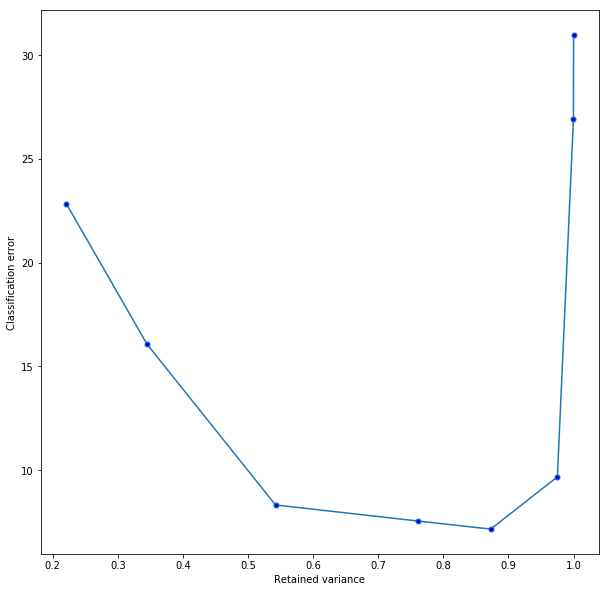

In [250]:
plt.plot(r_m, classification_errors, '-o', markerfacecolor='b', markersize=5)
plt.xlabel('Retained variance')
plt.ylabel('Classification error')
plt.show()

## Question II (Part 5):

#### projection of data onto LDA subspace (1st and 2nd directions):

In [262]:
lda = LDA()
lda_fit = lda.fit(X=dataB_fea, y=dataB_gnd.ravel())
dataB_fea_projected_LDA = lda_fit.transform(X=dataB_fea)
dataB_fea_projected_LDA_1and2 = dataB_fea_projected_LDA[:,0:2]
disp_array_beautiful(numpy_array=dataB_fea_projected_LDA_1and2, number_of_rows=10)

,0,1
0,-5.277233,-2.052912
1,-5.913727,-1.953482
2,-4.154543,-0.868888
3,-6.728769,-2.568941
4,-6.977105,-2.125944
5,-7.043006,-2.433204
6,-7.529504,-1.667304
7,-6.380275,-1.538234
8,-6.530964,-2.494244
9,-5.257274,-2.921786


#### plotting:

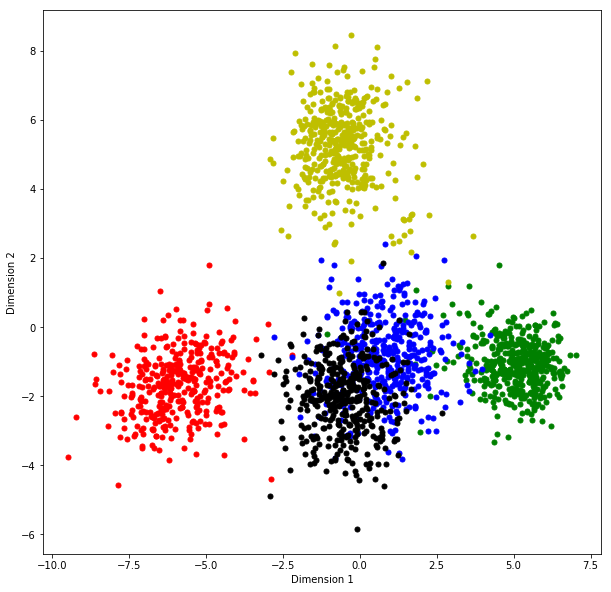

In [263]:
number_of_samples = len(dataB_gnd)
for sample_index in range(number_of_samples):
    sample = dataB_fea_projected_LDA_1and2[sample_index,:]
    if dataB_gnd[sample_index] == 0:
        color = 'r'
    elif dataB_gnd[sample_index] == 1:
        color = 'g'
    elif dataB_gnd[sample_index] == 2:
        color = 'b'
    elif dataB_gnd[sample_index] == 3:
        color = 'k'
    elif dataB_gnd[sample_index] == 4:
        color = 'y'
    plt.plot(sample[0], sample[1], 'o', markerfacecolor=color, markeredgecolor=color, markersize=5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# show plot bigger: https://stackoverflow.com/questions/41760737/output-figure-size-in-jupyter-notebook?rq=1
matplotlib.rcParams['figure.figsize'] = (10,10) 
plt.show()

# Question III:

## Question II (Part 4):

In [276]:
number_of_samples = dataB_fea.shape[0]
dimension_of_data = dataB_fea.shape[1]
dataB_fea_digit3 = np.empty([0, dimension_of_data])
for sample_index in range(number_of_samples):
    sample = dataB_fea[sample_index, :]
    if dataB_gnd[sample_index] == 2:  # means digit 3
        dataB_fea_digit3 = np.vstack([dataB_fea_digit3, sample])

In [277]:
lle = LLE(n_neighbors=5, n_components=4)
lle_fit = lle.fit(X=dataB_fea_digit3)
dataB_fea_mapped_lle = lle_fit.transform(X=dataB_fea_digit3)


In [278]:
dataB_fea_mapped_lle

array([[ 0.02612645, -0.0171753 ,  0.07930727, -0.04356671],
       [ 0.00141265,  0.07645208,  0.01474549,  0.03120967],
       [-0.0384209 , -0.04408354, -0.02038965, -0.0083061 ],
       ..., 
       [-0.0282457 ,  0.07311131,  0.0309274 ,  0.05155069],
       [ 0.03650265,  0.02480003, -0.03539297, -0.02461052],
       [ 0.00022547,  0.07535718,  0.01393253,  0.02155487]])

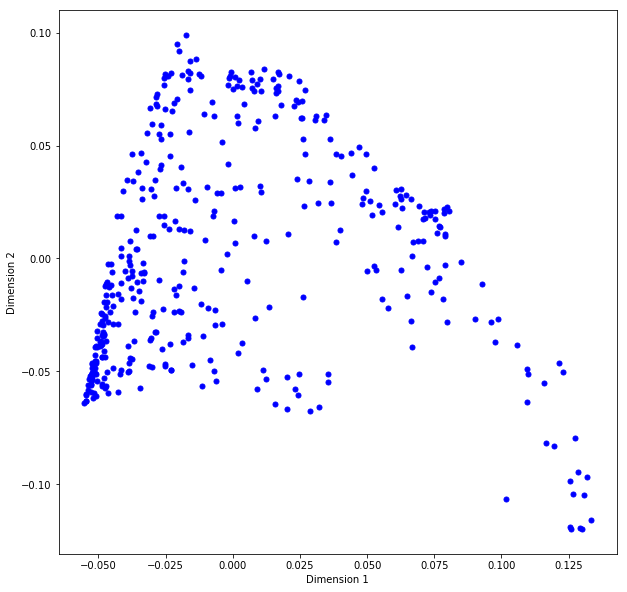

In [279]:
# http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.plot(dataB_fea_mapped_lle[:,0], dataB_fea_mapped_lle[:,1], 'o', markerfacecolor='b', markeredgecolor='b', markersize=5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# show plot bigger: https://stackoverflow.com/questions/41760737/output-figure-size-in-jupyter-notebook?rq=1
matplotlib.rcParams['figure.figsize'] = (10,10) 
plt.show()